In [451]:
import pandas as pd
import numpy as np 
from scipy.stats import t, f_oneway, chi2_contingency, ttest_ind,iqr, levene
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import statsmodels.api as sm
from statsmodels.stats.weightstats import ttest_ind as ttest
import warnings
warnings.filterwarnings('ignore')

<h2 style="color:purple;">Problem Statement</h2>

<h4>• Given a sample of data, study the dataset with multiple features to infer dependencies of the Hospitalization charges on other parameters with respect to the type of customer/patient.</h4>
<h4>• The major goal at hand is to shortlist the key features that impact hospitalization charges when a customer visits a hospital branch of an organization like Apollo Hospitals</h4>
<h4>• Then these shortlisted features can be used as training data(post numberical encoding) for a model, which, in future predicts the base hospitalization charge for any new customer that visits a branch of the same chain of hospitals.</h4>

In [258]:
df = pd.read_csv('https://***', index_col=0)

In [259]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   age                      1338 non-null   int64  
 1   sex                      1338 non-null   object 
 2   smoker                   1338 non-null   object 
 3   region                   1338 non-null   object 
 4   viral load               1338 non-null   float64
 5   severity level           1338 non-null   int64  
 6   hospitalization charges  1338 non-null   int64  
dtypes: float64(1), int64(3), object(3)
memory usage: 83.6+ KB


In [261]:
df.describe()

,age,viral load,severity level,hospitalization charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,10.221233,1.094918,33176.058296
std,14.049960,2.032796,1.205493,30275.029296
min,18.000000,5.320000,0.000000,2805.000000
25%,27.000000,8.762500,0.000000,11851.000000
50%,39.000000,10.130000,1.000000,23455.000000
75%,51.000000,11.567500,2.000000,41599.500000
max,64.000000,17.710000,5.000000,159426.000000


<h4>There are possible outliers in the data as max hospitalization charge is 5 times the mean. This could be due to some prolonged treatments for certain customers and can be confirmed later</h4>

In [262]:
for col in df.columns:
    print(col+':', df[col].nunique())

age: 47
sex: 2
smoker: 2
region: 4
viral load: 462
severity level: 6
hospitalization charges: 1320


In [263]:
df.isna().sum()

age                        0
sex                        0
smoker                     0
region                     0
viral load                 0
severity level             0
hospitalization charges    0
dtype: int64

<h2 style = 'color:red;'>Observation</h2>
<h4>There are 1338 datapoints across 7 columns in the dataset. 3 int64 columns and 1 float64, with 3 object type.</h4>
<h4>From number of unique values: (Sex, smoker, region, severity level) are categorical or discrete variables and (age , viral-load, hospitalization charges) are continuos variables </h4>
<h4>No null values are present in the dataset</h4>

<h2 style = 'color:indigo;'>Univariate</h2>

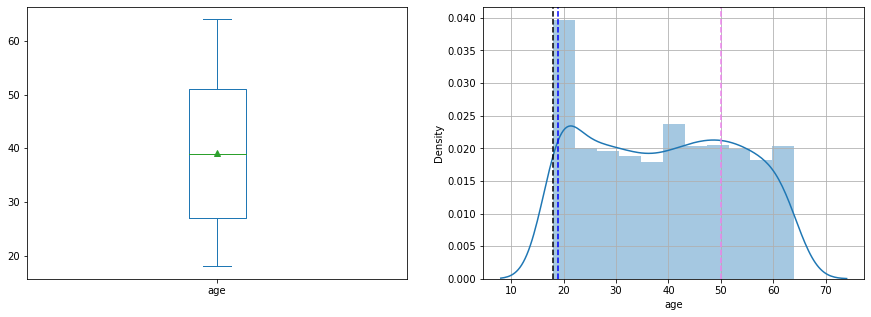

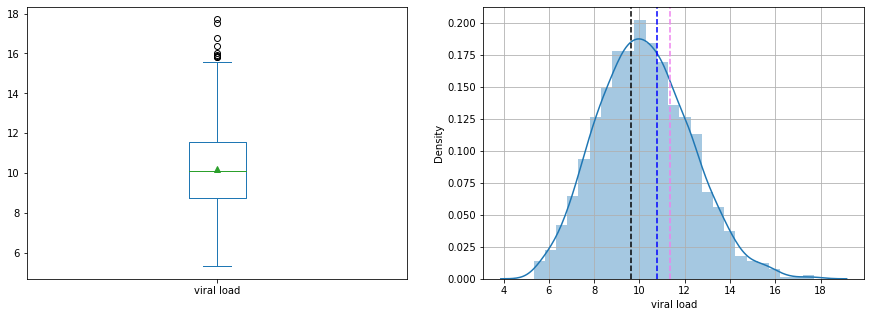

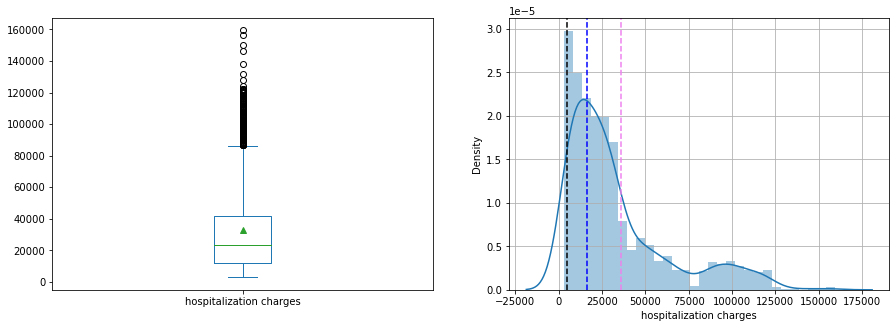

In [278]:
i,j=1,1
for col in df.columns:
    if (df[col].dtype == 'int64' or df[col].dtype == 'float64') and df[col].nunique()>15:
        x = list(df[col].value_counts().sort_values(ascending=False).index[:3])
        plt.figure(figsize=(15,5))
        plt.subplot(1,2,1)
        df[col].plot.box(showmeans = True)
        plt.subplot(1,2,2)
        sns.distplot(df[col])
        plt.axvline(x[0], ls='--', color='black')
        plt.axvline(x[1], ls='--', color='blue')
        plt.axvline(x[2], ls='--', color='violet')
        plt.grid()
        plt.show()

<h2 style = 'color:red;'>Observation</h2>
<h4>Age is observed to be a bimodal distribution, hence most customers are fall in the ages of 18-19 and 50 as per bimodal distribution</h4>
<h4>Viral load shows some outliers, but they are very few lying in the range of 16-18 load values. The distribution is identical to normal with most occurring values between 9-11.</h4>
<h4>Hospitalization charges, has 95% of values between 0 to 100000, rest are outliers with higher values being close to 160000, so these outliers need to be treated if they are not different in terms of feature value occurrences. The distribution is right skewed and shows a large peak near 20000 value.</h4>


In [265]:
# % of outliers in the hospitalization charges variable
hc = df['hospitalization charges']
p75 = hc.quantile(0.75)
p25 = hc.quantile(0.25)
iqr_ = iqr(df['hospitalization charges'])
ul = p75+(1.5*iqr_)
ll = p25-(1.5*iqr_)
outliers = df[(df['hospitalization charges']>ul) | (df['hospitalization charges']<ll)]
print('% of impactful outliers in the data:', (len(outliers)/len(hc))*100)

% of impactful outliers in the data: 10.388639760837071


In [411]:
df1 = df[(df['hospitalization charges']<ul) & (df['hospitalization charges']>ll)]

In [281]:
color = sns.color_palette(palette='hls', n_colors = 10)

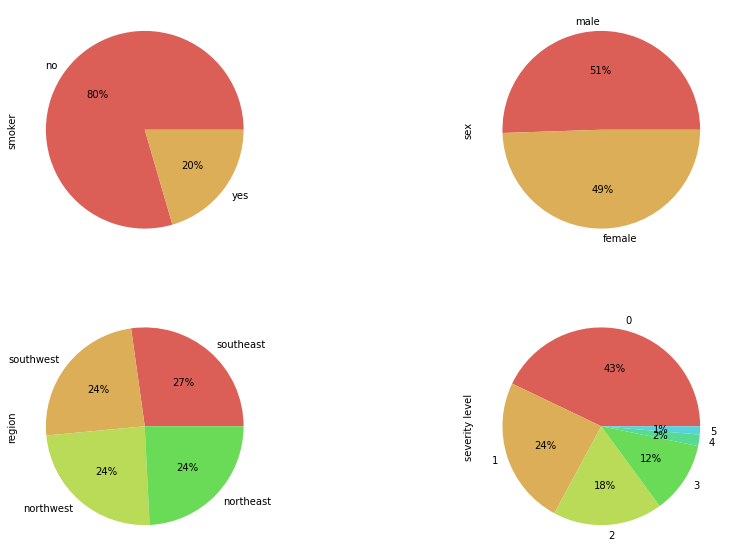

In [283]:
plt.figure(figsize=(15,10))
plt.subplot(2,2,1)
df['smoker'].value_counts().plot.pie(autopct = '%.0f%%', colors = color)
plt.subplot(2,2,2)
df['sex'].value_counts().plot.pie(autopct = '%.0f%%', colors = color)
plt.subplot(2,2,3)
df['region'].value_counts().plot.pie(autopct = '%.0f%%', colors = color)
plt.subplot(2,2,4)
df['severity level'].value_counts().plot.pie(autopct = '%.0f%%', colors = color)
plt.show()

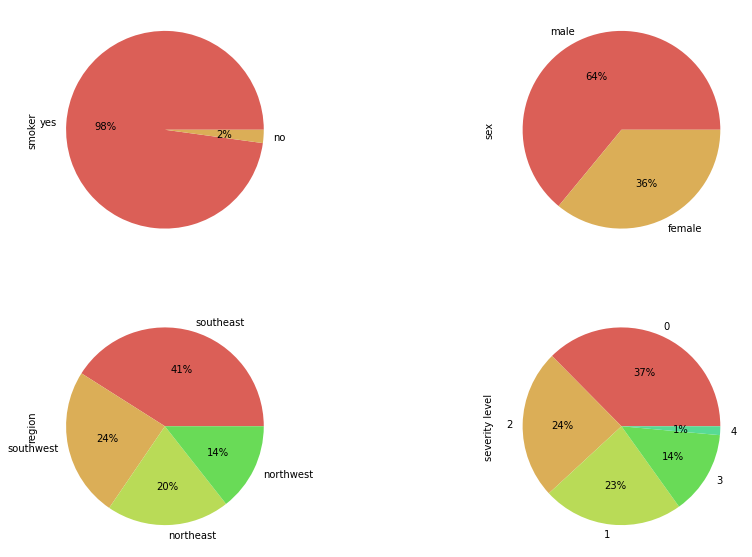

In [284]:
plt.figure(figsize=(15,10))
plt.subplot(2,2,1)
outliers['smoker'].value_counts().plot.pie(autopct = '%.0f%%', colors = color)
plt.subplot(2,2,2)
outliers['sex'].value_counts().plot.pie(autopct = '%.0f%%', colors = color)
plt.subplot(2,2,3)
outliers['region'].value_counts().plot.pie(autopct = '%.0f%%', colors = color)
plt.subplot(2,2,4)
outliers['severity level'].value_counts().plot.pie(autopct = '%.0f%%', colors = color)
plt.show()

<h4>The outliers categorical variables analysis shows, that all the outliers have dominance in 1 particular feature values across the variables, like 'yes' for smoker, 'male' for sex. Therefore, removing these outliers will remove the high correlation that hospitalization charges may have with these variables.</h4>

In [269]:
hot_encoded = pd.merge(pd.get_dummies(df['sex']), pd.get_dummies(df['smoker']),how = 'left', left_index = True, right_index = True).merge(pd.get_dummies(df['region']),how = 'left', left_index = True, right_index = True)

In [270]:
temp = pd.merge(df, hot_encoded,how = 'left', left_index = True, right_index = True)

<AxesSubplot:>

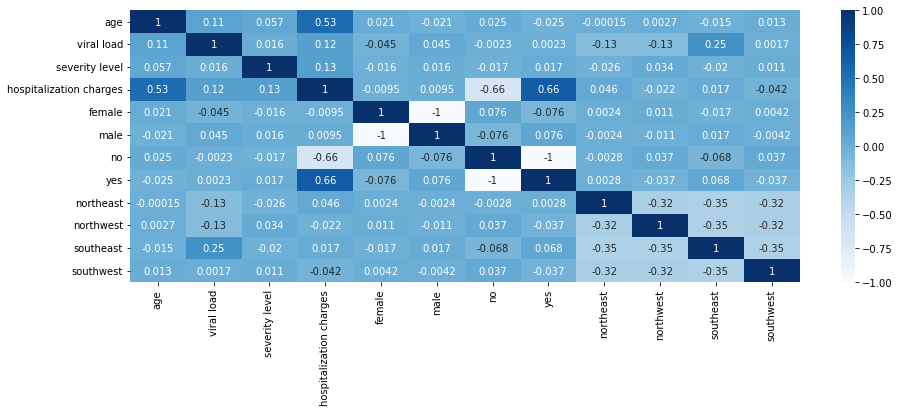

In [271]:
plt.figure(figsize = (15,5))
sns.heatmap(temp.corr(method = 'spearman'), annot = True, cmap = 'Blues')

<h4>• Age and hospitalization charges have a high positive correlation of 0.53, therefore higher the age, higher the hospitalization charge</h4>
<h4>• People from southeast tend to have higher viral loads, as both variables have 0.25 positive correlation</h4>
<h4>• Hospitalization charges have a very high direct correlation with smokers(yes) = 0.66</h4>
<h4>• Patients from southeast region tend of higher chances of being a smoker with a correlation of 0.068 compared to others which are less than 0.05</h4>
<h4>• Male patients tend to have higher chances of being smokers with a value of 0.076</h4>
<h4>• Viral load of females appears to be similar to males in terms of correlation</h4>

<h3 style = 'color:green;'>Hypotheses</h3>
<h4>1. Patients who are smokers have higher chances of being hospitalized therefore have higher mean charges-->T-test right tailed</h4>
<h4>2. Viral load of females is same as viral load of males-->T-Test two tailed</h4>
<h4>3. Patients from southeast region tend of higher chances of being a smoker compared to other regions, therefore they are inter-dependent variables-->Chi2 test of independence</h4>
<h4>4. Mean viral load of people from southeast is higher than mean value for other regions-->One way Annova</h4>
    <h4>5. Mean viral load for females in severity level 0,1 or 2 is different-->One way Annova</h4>

<h2 style = 'color:indigo;'>Multivariate Analysis & Hypothesis Testing</h2>

In [339]:
def bootstrap_means(var, n, r):
    means, std = [], []
    for x in range(r):
        s = var.sample(n)
        means.append(np.mean(s))
        std.append(np.std(s))
    return means, std

In [456]:
df

,age,sex,smoker,region,viral load,severity level,hospitalization charges
0,19,female,yes,southwest,9.30,0,42212
1,18,male,no,southeast,11.26,1,4314
2,28,male,no,southeast,11.00,3,11124
3,33,male,no,northwest,7.57,0,54961
4,32,male,no,northwest,9.63,0,9667
...,...,...,...,...,...,...,...
1333,50,male,no,northwest,10.32,3,26501
1334,18,female,no,northeast,10.64,0,5515
1335,18,female,no,southeast,12.28,0,4075
1336,21,female,no,southwest,8.60,0,5020


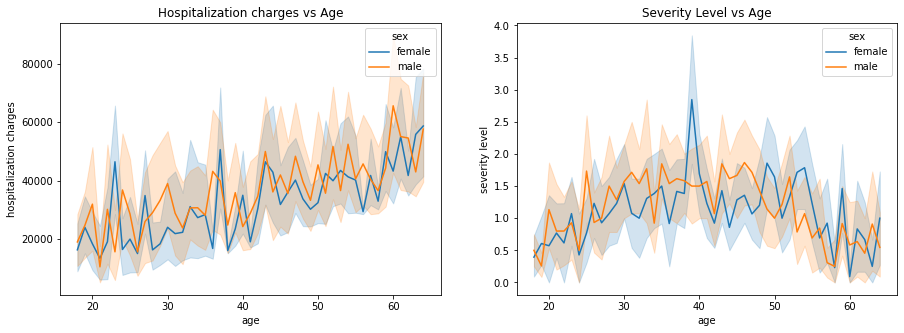

In [467]:
plt.figure(figsize = (15,5))
plt.subplot(1,2,1)
sns.lineplot(df.sort_values(by = 'age')['age'], df.sort_values(by = 'age')['hospitalization charges'], hue = df['sex'])
plt.title('Hospitalization charges vs Age')
plt.subplot(1,2,2)
sns.lineplot(df.sort_values(by = 'age')['age'], df.sort_values(by = 'age')['severity level'], hue = df['sex'])
plt.title('Severity Level vs Age')
plt.show()

<h3 style="color:red;">Observation</h3>
<h4>• As correlation values predicted, higher age values of patients directly impact the hospitalization charges.</h4>
<h4>• However, there are some significant peaks observed for females between the ages of 23-25 and then later on near 37-39. The severity levels for females in the age of 20-35 stay well below 1.5, so the causes for peak in charges might be due to accidents or some other cases of preganancy based hospitalizations etc.</h4>
<h4>• There is a sudden peak at age 40 for females, so that is when alot of females undergo drops in immunity, so Apollo hospitals should launch combined health checkup packages for females of reaching or close to this age</h4>
<h4>• For males, peaks are observed at higher ages like 60, mostly due to age based ailments. While that is true, females still have higher severity levels compared to males</h4>

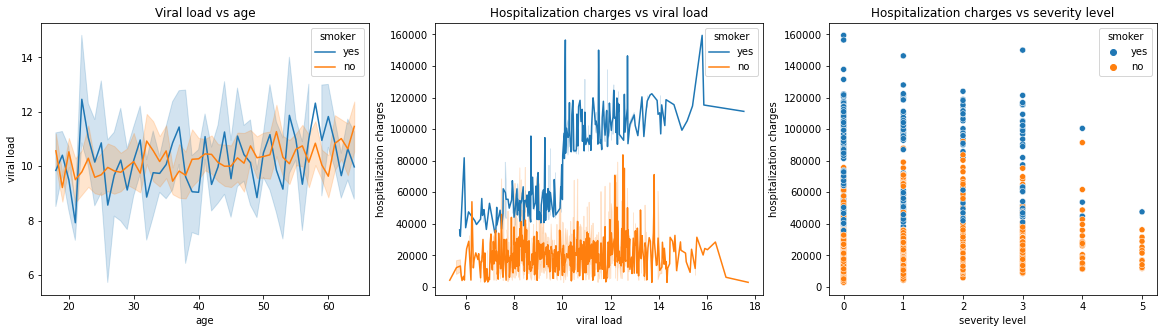

In [475]:
plt.figure(figsize = (20,5))
plt.subplot(1,3,1)
sns.lineplot(df.sort_values(by = 'age')['age'], df.sort_values(by = 'age')['viral load'], hue = df['smoker'])
plt.title('Viral load vs age')
plt.subplot(1,3,2)
sns.lineplot(df.sort_values(by = 'viral load')['viral load'], df.sort_values(by = 'viral load')['hospitalization charges'], hue = df['smoker'])
plt.title('Hospitalization charges vs viral load')
plt.subplot(1,3,3)
sns.scatterplot(df['severity level'], df['hospitalization charges'], hue = df['smoker'])
plt.title('Hospitalization charges vs severity level')
plt.show()

In [471]:
len(df[(df['smoker']=='yes') & (df['viral load']>10)])/len(df[df['smoker']=='yes'])*100

52.55474452554745

<h3 style="color:red;">Observation</h3>
<h4>• Viral load for non smokers with increasing ages does not vary much and remains around a average value of 10. Similarly, even though peaks and troughs in viral load are higher for smokers, there is inconclusive evidence that smokers experience higher viral load with increasing age as the slope is consistent</h4>
<h4>• Smokers between the age of 55-60 do show high viral loads, so Apollo hospitals should run campaigns of awareness for patients in this category and can shortlist such patients to provide them with hospitalization subscriptions. As they would probably need more hospitalizations in future.</h4>
<h4>• For non smokers, the hospitalization charges average out between 25-30000. For Non smokers the lower average is around 45000, which is 50% higher when the viral load is between 6-10. While severity levels for smokers fall in the lower categories, even then the hospitalization charges are above a minimum of 50000</h4>
<h4>• Apollo hospitals can start therapy sessions for smokers, which can be promoted as means of reducing their hospitalization charge and as a social activity also help them promote a new segment of their treatment</h4>

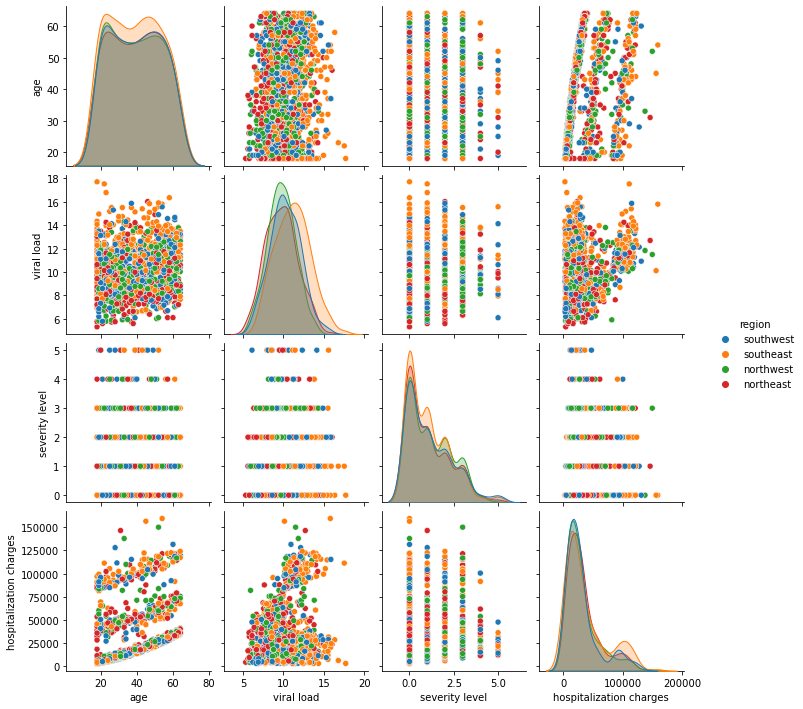

In [485]:
sns.pairplot(df, hue = 'region')

<h2>Hypothesis 1</h2>

In [429]:
fig = px.box(df, x="smoker", y="hospitalization charges")
fig.show()

<h4>As hypothesized, the mean values of hospitalization for smokers is higher than non smokers. A t-test will performed now to confirm if its actually greater</h4>
<h3>T-test Approach 1</h3>

    Null Hypothesis--> 
    H0 = Average charge of hospitalization for smokers and non smokers does not vary much.
         Mean(hospitalization charges) if smoker->yes = Mean(hospitalization charges) if smoker->no
    Alternative Hypothesis--> Requiring confirmation with 95% confidence
    H1 = Average charge of hospitalization for smokers and non smokers is not comparable.
         Mean(hospitalization charges) if smoker->yes != Mean(hospitalization charges) if smoker->no
    H1a = Average charge of hospitalization for smokers is greater than that of non smokers.
         Mean(hospitalization charges) if smoker->yes > Mean(hospitalization charges) if smoker->no

In [287]:
smoker = df[df['smoker']=='yes']['hospitalization charges']
non_s = df[df['smoker']=='no']['hospitalization charges']

In [288]:
#Assumption: Sample means and standard deviation are finite
sm = np.mean(smoker)
nsm = np.mean(non_s)
sd1 = np.std(smoker)
sd2 = np.std(non_s)
print('Sample mean charges for Smoker:', sm)
print('Sample mean charges for Non-smokers:', nsm)
print('Sample standard deviation for Smokers:', sd1)
print('Sample standard deviation for Non-smokers:', sd2)

Sample mean charges for Smoker: 80125.57299270073
Sample mean charges for Non-smokers: 21085.6757518797
Sample standard deviation for Smokers: 28801.18992162662
Sample standard deviation for Non-smokers: 14977.412277719432


In [340]:
#Assumpton: Sample Means follow gaussian distribution since pop means and standard deviations are finite
smoker_means, sm_st = np.array(bootstrap_means(smoker, 30, 50))
non_smoker_means, nsm_st = np.array(bootstrap_means(non_s, 30, 50))

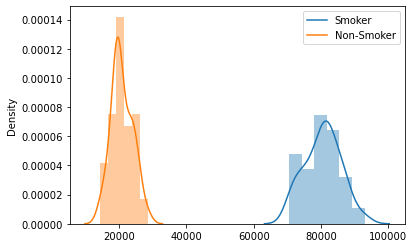

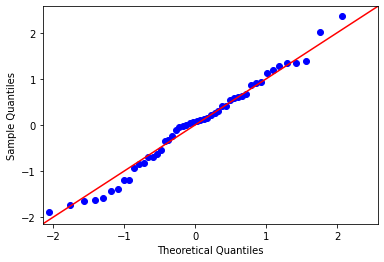

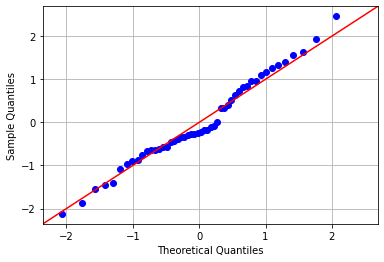

In [341]:
sns.distplot(smoker_means)
sns.distplot(non_smoker_means)
plt.legend(['Smoker', 'Non-Smoker'])
sm.qqplot(smoker_means, line='45', fit = True)
sm.qqplot(non_smoker_means, line='45', fit = True)
plt.grid()
plt.show()

In [336]:
ttest_ind(smoker.sample(30), non_s.sample(30), equal_var = False)

Ttest_indResult(statistic=7.965650656937618, pvalue=6.755317541739331e-10)

<h2 style="color:red;">Observation</h2>
    
<h4>Considering 95% confidence for H1 or H1a, significance value α= 0.05.</h4>
<h4>Taking a sample size of 30, the test statistic obtained is 7.965 and p-val<0.05, proving that both means are different, therefore we can reject the null hypothesis</h4>
    <h3>T-test 1 tailed for H1a</h3>

In [453]:
ttest_ind(smoker.sample(30), non_s.sample(30), equal_var = False, alternative = 'greater')

Ttest_indResult(statistic=7.2389460619058905, pvalue=2.7352399084299342e-09)

<h3 style = 'color:green;'>Conclusion</h3>
<h4>Taking a sample size of 30, the test statistic obtained is 7.239 and p-val<0.05, proving that both means are different, therefore we can reject the null hypothesis and given the alternative H1a accept that hospitalization charges are greater for smokers than non smokers</h4>

<h3>T-test Approach 2</h3>

<h3>Counting the number of hospitalizations for smokers in a randomly sample of size 30 from the population. Testing the counts for 50 variations of the sample to statistically test if the number of hospitalizations are more for smokers on average</h4>

In [387]:
#using the get dummies, 'yes' is for smokers and its sum gives the count of smokers from a sample
smoke = pd.Series([temp.sample(30)['yes'].sum() for x in range(50)])
#using the get dummies, 'no' is for non-smokers and its sum gives the count of smokers from a sample
nsmoke = pd.Series([temp.sample(30)['no'].sum() for x in range(50)])

In [388]:
#Assumption: Sample means and standard deviation are finite
sm = np.mean(smoke)
nsm = np.mean(nsmoke)
sd1 = np.std(smoke)
sd2 = np.std(nsmoke)
print('Sample mean count for Smoker:', sm)
print('Sample mean count for Non-smokers:', nsm)
print('Sample standard deviation for Smokers:', sd1)
print('Sample standard deviation for Non-smokers:', sd2)

Sample mean count for Smoker: 6.28
Sample mean count for Non-smokers: 24.06
Sample standard deviation for Smokers: 2.5380307326744482
Sample standard deviation for Non-smokers: 1.9329769786523587


In [391]:
ttest_ind(smoke.sample(30), nsmoke.sample(30), equal_var = True)

Ttest_indResult(statistic=-34.81230569305768, pvalue=1.4397561064305497e-40)

<h2 style="color:red;">Observation</h2>
    
<h4>Considering 95% confidence for H1 or H1a, significance value α= 0.05.</h4>
<h4>Test statistic obtained is -34.8, which is highly negative, p-val<α, therefore, mean count of hospitalization for both samples of smokers and non smokers is unequal, null hypothesis is rejected</h4>

In [455]:
ttest_ind(smoke, nsmoke, equal_var = True, alternative = 'greater')

Ttest_indResult(statistic=-39.01203214387194, pvalue=1.0)

<h4>Since the p-val>0.05 for a 1 tailed test for Null hypothesis H1:Mean count of hospitalizations for smokers is more compared to non smokers, so the Null hypothesis can't be rejected and thus H1 is untrue.<h4>

<h3>Hypothesis 2</h3>

In [421]:
viral_f = df[df['sex']=='female']['viral load']
viral_m = df[df['sex']=='male']['viral load']

<h3>T-test 2 tailed</h3>

    Null Hypothesis--> 
    H0 = Mean viral load for males and females is equal.
         Mean(Viral Load) if sex->female = Mean(Viral Load) if sex->male
    Alternative Hypothesis--> Requiring confirmation with 95% confidence
    H1 = Mean viral load for males and females is not equal.
         Mean(Viral Load) if sex->female != Mean(Viral Load) if sex->male

In [430]:
fig = px.box(df, x="sex", y="viral load")
fig.show()

In [425]:
#Assumption: Sample means and standard deviation are finite
male = np.mean(viral_m)
fem= np.mean(viral_f)
sd1 = np.std(viral_m)
sd2 = np.std(viral_f)
print('Sample mean Viral load for males:', male)
print('Sample mean Viral load for females:', fem)
print('Sample standard deviation for Male viral loads:', sd1)
print('Sample standard deviation for Female viral loads:', sd2)

Sample mean Viral load for males: 10.314423076923074
Sample mean Viral load for females: 10.126072507552859
Sample standard deviation for Male viral loads: 2.045374661864287
Sample standard deviation for Female viral loads: 2.01387895412623


In [426]:
#Assumpton: Sample Means follow gaussian distribution since pop means and standard deviations are finite
m_means, _ = np.array(bootstrap_means(viral_m, 30, 50))
f_means, _ = np.array(bootstrap_means(viral_f, 30, 50))

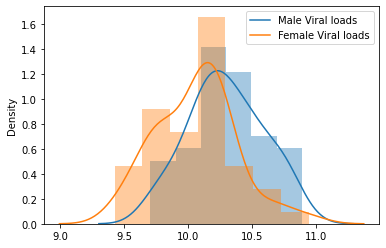

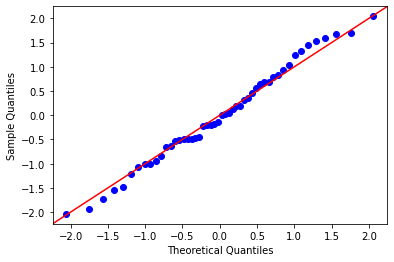

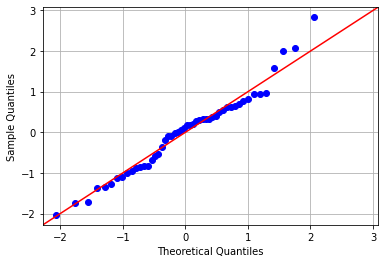

In [427]:
sns.distplot(m_means)
sns.distplot(f_means)
plt.legend(['Male Viral loads', 'Female Viral loads'])
sm.qqplot(m_means, line='45', fit = True)
sm.qqplot(f_means, line='45', fit = True)
plt.grid()
plt.show()

In [428]:
ttest_ind(viral_m.sample(30), viral_f.sample(30))

Ttest_indResult(statistic=1.1411278918062564, pvalue=0.2585064952067514)

<h2 style="color:red;">Observation</h2>
    
<h4>Considering 95% confidence for H1, significance value α= 0.05.</h4>
<h4>Test statistic obtained is 1.14, p-val--(0.258>α)</h4>
<h4>So based on the results of the T-test, we fail to reject the Null Hypothesis</h4>
<h4>Hence, viral loads for females are not very different from viral loads for males</h4>

<h3>Hypothesis 3: </h3>

<h2>Chi2 test of independence</h2>

    Null Hypothesis--> 
    H0 = Smoker and region are independent, being from any region do not increase chances of being a smoker.
    Alternative Hypothesis--> Requiring confirmation with 95% confidence
    H1 = Smoker and region are dependent, being from a region can increase chances of being a smoker.

In [434]:
relation = pd.crosstab(df['smoker'], df['region'])
relation

region,northeast,northwest,southeast,southwest
smoker,,,,
no,257,267,273,267
yes,67,58,91,58


In [437]:
stat, p, dof, _ = chi2_contingency(relation)

In [439]:
#p-value
p

0.06171954839170547

<h2 style="color:red;">Observation</h2>
    
<h4>Considering 95% confidence for H1, significance value α= 0.05.</h4>
<h4>Since p-val>α, therefore, we fail to reject the null hypothesis</h4>
<h4>Hence, there is no definite correlation between being a smoker and region</h4>

<h3>Hypothesis 4: </h3>

<h3>Hypothesis 5: </h3>

<h2>One way Annova</h2>

    Null Hypothesis--> 
    H0 = Mean viral load for females in severity level 0,1 or 2 is same.
    Alternative Hypothesis--> Requiring confirmation with 95% confidence
    H1 = Mean viral load for females in severity level 0,1 or 2 is different for all, or for some.

In [446]:
#Assumption 1: All samples must follow Gaussian distributions
fem0 = df[(df['severity level']==0) & (df['sex']=='female')]['viral load']
fem1 = df[(df['severity level']==1) & (df['sex']=='female')]['viral load']
fem2 = df[(df['severity level']==2) & (df['sex']=='female')]['viral load']

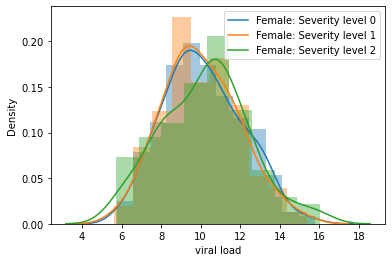

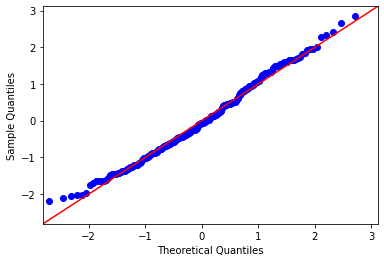

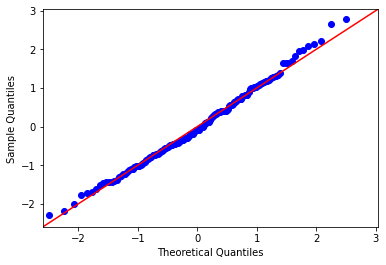

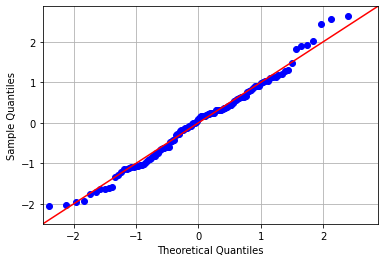

In [450]:
sns.distplot(fem0)
sns.distplot(fem1)
sns.distplot(fem2)
plt.legend(['Female: Severity level 0', 'Female: Severity level 1','Female: Severity level 2'])
sm.qqplot(fem0, line='45', fit = True)
sm.qqplot(fem1, line='45', fit = True)
sm.qqplot(fem2, line='45', fit = True)
plt.grid()
plt.show()

<h4>The distributions followed are close to Gaussian, confirmed by the qqplots</h4>

<h4>Assumption 2 for Anova: Performing Levene test to check equality of data variances, threshold α=0.05</h4>
<h4>H0:Variances for all groups are more or less equal</h4>
<h4>H1:Variances vary largely</h4>

In [452]:
levene(fem0,fem1,fem2, center='mean')

LeveneResult(statistic=0.9516313931399634, pvalue=0.38673078296344054)

<h4>As observed above, p-val>0.05, hence variances are equal since we fail to reject the null hypothesis for levene's test</h4>

In [454]:
f_oneway(fem0, fem1, fem2)

F_onewayResult(statistic=0.3355061434584082, pvalue=0.7151189650367746)

<h2 style="color:red;">Observation</h2>
    
<h4>Considering 95% confidence for H1, significance value α= 0.05.</h4>
<h4>Since p-val>α, therefore, we fail to reject the null hypothesis</h4>
<h4>Hence, there is no definite difference between mean values for females of varying severity levels</h4>

<h2 style = 'color:purple;'>Key Insights & Recommendations</h2>

<h3>1. Primary features for predicting hospitalization charges in priority order:</h3>
<h4>• Age and hospitalization charges have a high positive correlation of 0.53, therefore higher the age, higher the hospitalization charge</h4>
<h4>• Hospitalization charges have a very high direct correlation with smokers(yes) = 0.66, it is consistently observed that smokers have a high average of 50000 hospitalization charges even with severity level as low as 0. This was confirmed by statistical testing.</h4>
<h4>• Viral load: Patients with history of smoking tend of extremely high hospitalization charges for viral loads of above 10</h4>
<h3>Other Insights:</h3>
<h4>• People from southeast tend to have higher viral loads, as both variables have 0.25 positive correlation</h4>
<h4>• Hospitalization charges have a very high direct correlation with smokers(yes) = 0.66</h4>
<h4>• Patients from southeast region tend of higher chances of being a smoker with a correlation of 0.068 compared to others which are less than 0.05</h4>
<h4>• Male patients tend to have higher chances of being smokers with a value of 0.076</h4>
<h4>• As correlation values predicted, higher age values of patients directly impact the hospitalization charges.</h4>

<h4>• There is a sudden peak at age 40 for females, so that is when alot of females undergo drops in immunity, so Apollo hospitals should launch combined health checkup packages for females of reaching or close to this age</h4>
<h4>• For males, peaks are observed at higher ages like 60, mostly due to age based ailments. While that is true, females still have higher severity levels compared to males</h4>
<h4>• Viral load for non smokers with increasing ages does not vary much and remains around a average value of 10. Similarly, even though peaks and troughs in viral load are higher for smokers, there is inconclusive evidence that smokers experience higher viral load with increasing age as the slope is consistent</h4>


<h3>Recommendations:</h3>
<h4>• There are some significant peaks observed for females between the ages of 23-25 and then later on near 37-39. The severity levels for females in the age of 20-35 stay well below 1.5, so the causes for peak in charges might be due to accidents or some other cases of preganancy based hospitalizations etc. During these age periods when females come in for checkups they should be guided towards Gynaecologists to detect any early issues they might have. This system will help female customers gain trust with the hospitals and ensure revisits.</h4>
<h4>• Smokers between the age of 55-60 do show high viral loads, so Apollo hospitals should run campaigns of awareness for patients in this category and can shortlist such patients to provide them with hospitalization subscriptions. As they would probably need more hospitalizations in future.</h4>
<h4>• For non smokers, the hospitalization charges average out between 25-30000. For Non smokers the lower average is around 45000, which is 50% higher when the viral load is between 6-10. While severity levels for smokers fall in the lower categories, even then the hospitalization charges are above a minimum of 50000.</h4>
<h4>• Apollo hospitals can start therapy sessions for smokers, which can be promoted as means of reducing their hospitalization charge and as a social activity also help them promote a new segment of their treatment</h4>
<h4>• Being a smoker and belonging to a particular region of Delhi does not have any significant relation. So as a parameter this should not be the basis of judgement and calculation of the charges</h4>